In [157]:
#using microsoft stocks data till the date using finances from yahoo.com
#1. we need to analyse
#USING RANDOM FOREST CLASSIFIER



In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [159]:
import yfinance as yf

In [160]:
msf = yf.Ticker("MSFT")

In [161]:
msf= msf.history(period ="max")

In [162]:
msf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055121,0.063227,0.055121,0.060524,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060524,0.063767,0.060524,0.062686,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062686,0.064307,0.062686,0.063767,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063767,0.064307,0.061605,0.062145,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062145,0.062686,0.060524,0.061065,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-12 00:00:00-04:00,328.579987,332.100006,325.160004,331.850006,24260300,0.0,0.0
2023-06-13 00:00:00-04:00,334.470001,336.980011,330.390015,334.290009,22951300,0.0,0.0
2023-06-14 00:00:00-04:00,334.339996,339.040009,332.809998,337.339996,26003800,0.0,0.0


In [163]:
msf.index

DatetimeIndex(['1986-03-13 00:00:00-05:00', '1986-03-14 00:00:00-05:00',
               '1986-03-17 00:00:00-05:00', '1986-03-18 00:00:00-05:00',
               '1986-03-19 00:00:00-05:00', '1986-03-20 00:00:00-05:00',
               '1986-03-21 00:00:00-05:00', '1986-03-24 00:00:00-05:00',
               '1986-03-25 00:00:00-05:00', '1986-03-26 00:00:00-05:00',
               ...
               '2023-06-05 00:00:00-04:00', '2023-06-06 00:00:00-04:00',
               '2023-06-07 00:00:00-04:00', '2023-06-08 00:00:00-04:00',
               '2023-06-09 00:00:00-04:00', '2023-06-12 00:00:00-04:00',
               '2023-06-13 00:00:00-04:00', '2023-06-14 00:00:00-04:00',
               '2023-06-15 00:00:00-04:00', '2023-06-16 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=9392, freq=None)

In [164]:
msf=msf.drop(["Dividends","Stock Splits"],axis=1)

In [165]:
msf


,Open,High,Low,Close,Volume
Date,,,,,
1986-03-13 00:00:00-05:00,0.055121,0.063227,0.055121,0.060524,1031788800
1986-03-14 00:00:00-05:00,0.060524,0.063767,0.060524,0.062686,308160000
1986-03-17 00:00:00-05:00,0.062686,0.064307,0.062686,0.063767,133171200
1986-03-18 00:00:00-05:00,0.063767,0.064307,0.061605,0.062145,67766400
1986-03-19 00:00:00-05:00,0.062145,0.062686,0.060524,0.061065,47894400
...,...,...,...,...,...
2023-06-12 00:00:00-04:00,328.579987,332.100006,325.160004,331.850006,24260300
2023-06-13 00:00:00-04:00,334.470001,336.980011,330.390015,334.290009,22951300
2023-06-14 00:00:00-04:00,334.339996,339.040009,332.809998,337.339996,26003800


In [166]:
msf["Tomorrow"]= msf["High"].shift(-1)

In [167]:
msf

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1986-03-13 00:00:00-05:00,0.055121,0.063227,0.055121,0.060524,1031788800,0.063767
1986-03-14 00:00:00-05:00,0.060524,0.063767,0.060524,0.062686,308160000,0.064307
1986-03-17 00:00:00-05:00,0.062686,0.064307,0.062686,0.063767,133171200,0.064307
1986-03-18 00:00:00-05:00,0.063767,0.064307,0.061605,0.062145,67766400,0.062686
1986-03-19 00:00:00-05:00,0.062145,0.062686,0.060524,0.061065,47894400,0.061065
...,...,...,...,...,...,...
2023-06-12 00:00:00-04:00,328.579987,332.100006,325.160004,331.850006,24260300,336.980011
2023-06-13 00:00:00-04:00,334.470001,336.980011,330.390015,334.290009,22951300,339.040009
2023-06-14 00:00:00-04:00,334.339996,339.040009,332.809998,337.339996,26003800,349.839996


In [168]:
# making a target for us to predict here we will be predicting whether a stock price will increase or decrease based on high and tomorrow pred

In [169]:
msf["Target"]= (msf["Tomorrow"]>msf["High"]).astype(int)

In [170]:
msf

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055121,0.063227,0.055121,0.060524,1031788800,0.063767,1
1986-03-14 00:00:00-05:00,0.060524,0.063767,0.060524,0.062686,308160000,0.064307,1
1986-03-17 00:00:00-05:00,0.062686,0.064307,0.062686,0.063767,133171200,0.064307,0
1986-03-18 00:00:00-05:00,0.063767,0.064307,0.061605,0.062145,67766400,0.062686,0
1986-03-19 00:00:00-05:00,0.062145,0.062686,0.060524,0.061065,47894400,0.061065,0
...,...,...,...,...,...,...,...
2023-06-12 00:00:00-04:00,328.579987,332.100006,325.160004,331.850006,24260300,336.980011,1
2023-06-13 00:00:00-04:00,334.470001,336.980011,330.390015,334.290009,22951300,339.040009,1
2023-06-14 00:00:00-04:00,334.339996,339.040009,332.809998,337.339996,26003800,349.839996,1


In [171]:
msf["Target"].value_counts()

1    4826
0    4566
Name: Target, dtype: int64

In [172]:
# plotting the graph


<Axes: xlabel='Date'>

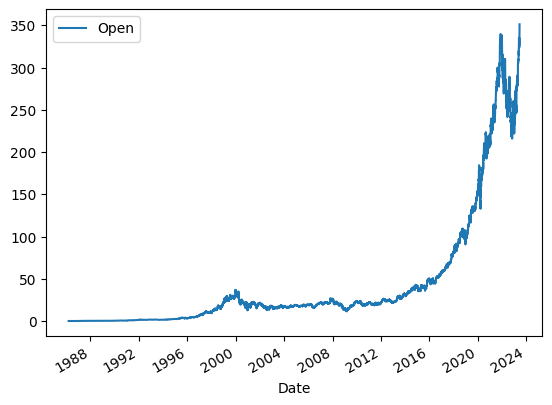

In [173]:
msf.plot.line(y="Open",use_index=True)

In [174]:
#as we can see data before 1995 is not much useful as there is no change so we remove
msf= msf.loc["1995-01-01":].copy()

In [175]:
msf


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1995-01-03 00:00:00-05:00,2.392878,2.392878,2.339379,2.341810,39545600,2.363697,0
1995-01-04 00:00:00-05:00,2.344243,2.363697,2.315062,2.358834,51611200,2.373424,1
1995-01-05 00:00:00-05:00,2.368560,2.373424,2.310197,2.319925,39824000,2.383152,1
1995-01-06 00:00:00-05:00,2.329653,2.383152,2.324789,2.358834,46681600,2.373424,0
1995-01-09 00:00:00-05:00,2.368560,2.373424,2.324788,2.344242,46000000,2.392878,1
...,...,...,...,...,...,...,...
2023-06-12 00:00:00-04:00,328.579987,332.100006,325.160004,331.850006,24260300,336.980011,1
2023-06-13 00:00:00-04:00,334.470001,336.980011,330.390015,334.290009,22951300,339.040009,1
2023-06-14 00:00:00-04:00,334.339996,339.040009,332.809998,337.339996,26003800,349.839996,1


In [176]:
#training the intial model

In [177]:
from sklearn.ensemble import RandomForestClassifier


In [178]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100,random_state=1)


In [179]:
#making the train and test data
train = msf.iloc[:-1000].copy()
test = msf.iloc[-1000:].copy()

In [180]:
#choosing predictors
predictors= ["Open","High","Low","Close","Volume"]

In [181]:
#by choosing the predictors we know the features we will be using to train our model
#fit the model
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [182]:
from sklearn.metrics import precision_score

In [183]:
#now we will predict on our test data
preds= model.predict(test[predictors])

In [184]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,

In [185]:
#converting this numpy to understandable
preds= pd.Series(preds,index= test.index, name="predictions")

In [186]:
preds.head()

Date
2019-06-28 00:00:00-04:00    1
2019-07-01 00:00:00-04:00    1
2019-07-02 00:00:00-04:00    1
2019-07-03 00:00:00-04:00    1
2019-07-05 00:00:00-04:00    1
Name: predictions, dtype: int64

#checking precsion score or pred
precision_score(test["Target"],preds)

In [187]:

precision_score(test["Target"],preds)

0.5583524027459954

In [188]:
#now we plot test["Target "] and predicted values
combined = pd.concat([test["Target"],preds],axis=1)

In [189]:
combined

,Target,predictions
Date,,
2019-06-28 00:00:00-04:00,1,1
2019-07-01 00:00:00-04:00,0,1
2019-07-02 00:00:00-04:00,1,1
2019-07-03 00:00:00-04:00,0,1
2019-07-05 00:00:00-04:00,0,1
...,...,...
2023-06-12 00:00:00-04:00,1,1
2023-06-13 00:00:00-04:00,1,1
2023-06-14 00:00:00-04:00,1,1


<Axes: xlabel='Date'>

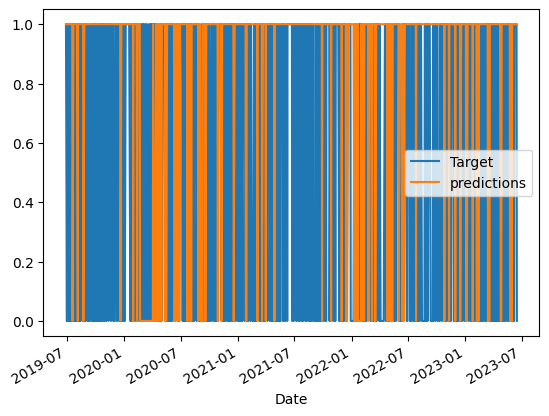

In [190]:
combined.plot()

In [191]:
#making a function for everything we did till now

In [192]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined


we do backtesting to check our models predictions for each year.
here we keep in mind that the financial year for trading is 250 days
so we are giving our model a time periods of 10 yrs (2500) to train  the model and then predict for next year
we have kept the step 250 implies that next time our model will train for 1-11 yrs and predict the output for 12th year

In [193]:
#bakctesting
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)


In [194]:
predictions = backtest(msf, model, predictors)




In [195]:
predictions["Predictions"].value_counts()

0    2801
1    1864
Name: Predictions, dtype: int64

In [196]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5316523605150214

In [197]:
#now we will add few more predictors in this mainly rolling means of last 2 days or last 5 trading days or 60 days or 250 days or 1000 days
horizons=[2,5,60,250,1000]
new_predictors = []

In [198]:
for horizon in horizons:
  rolling_avg = msf.rolling(horizon).mean()

  ratio_column = f"High ratio{horizon}"
  msf[ratio_column]= msf["High"]/rolling_avg["High"]

  trend_column = f"Trend{horizon}"
  msf[trend_column]= msf.shift(1).rolling(horizon).sum()["Target"]

  new_predictions=[ratio_column,trend_column]

In [199]:
msf= msf.dropna()

In [200]:
msf

,Open,High,Low,Close,Volume,Tomorrow,Target,High ratio2,Trend2,High ratio5,Trend5,High ratio60,Trend60,High ratio250,Trend250,High ratio1000,Trend1000
Date,,,,,,,,,,,,,,,,,
1998-12-16 00:00:00-05:00,20.621551,21.030091,20.096285,20.816093,60024000,20.991183,0,1.011699,1.0,1.008114,3.0,1.182377,33.0,1.392086,138.0,2.584321,543.0
1998-12-17 00:00:00-05:00,20.884185,20.991183,20.582643,20.913366,46963600,21.516449,1,0.999074,1.0,1.005873,2.0,1.176586,32.0,1.385526,138.0,2.573648,543.0
1998-12-18 00:00:00-05:00,21.010637,21.516449,20.874457,21.448359,59648000,22.129256,1,1.012357,1.0,1.025594,2.0,1.201899,32.0,1.415935,139.0,2.631872,543.0
1998-12-21 00:00:00-05:00,21.574808,22.129256,21.438628,21.856895,48112000,21.866625,0,1.014040,2.0,1.041762,3.0,1.230947,33.0,1.451619,140.0,2.700308,543.0
1998-12-22 00:00:00-05:00,21.866625,21.866625,21.380268,21.545630,41350000,22.382163,1,0.994031,1.0,1.016735,3.0,1.211770,32.0,1.429804,140.0,2.661929,543.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-09 00:00:00-04:00,324.989990,329.989990,324.410004,326.790009,22514900,332.100006,1,1.005102,1.0,0.990931,2.0,1.089450,32.0,1.245962,132.0,1.410912,542.0
2023-06-12 00:00:00-04:00,328.579987,332.100006,325.160004,331.850006,24260300,336.980011,1,1.003187,2.0,1.001152,2.0,1.093040,32.0,1.252312,133.0,1.418722,542.0
2023-06-13 00:00:00-04:00,334.470001,336.980011,330.390015,334.290009,22951300,339.040009,1,1.007294,2.0,1.014878,3.0,1.105809,32.0,1.268923,134.0,1.438316,542.0


In [201]:
#making changes in the model increasing the number of DCTs
model = RandomForestClassifier(n_estimators=200,min_samples_split =50, random_state=1)

In [202]:
def predict(train , test, predictors, model):
  model.fit(train[predictors],train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds>=0.5]=1
  preds[preds<0.5]=0
  preds= pd.Series(preds,index=test.index,name="Predictions")
  combined= pd.concat([test["Target"],preds],axis=1)
  return combined

In [203]:
predictions= backtest(msf,model,new_predictions)

In [204]:
predictions["Predictions"].value_counts()

0.0    2477
1.0    1187
Name: Predictions, dtype: int64

In [205]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5223251895534962